In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data_path = '/Users/jun/GitStudy/Data_4/Data/eCommerce3'
os.chdir(data_path)

In [3]:
orders = pd.read_csv('orders.csv')
orders.dropna(subset=['order_approved_at','order_delivered_timestamp'],inplace=True)

# 데이터 형식 바꾸기
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors = 'coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors = 'coerce')
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'], errors = 'coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors = 'coerce')


# 날짜 데이터 이상치확인
# 역방향이면 이상치로 의심
Check_date_outliers = orders[
    (orders['order_purchase_timestamp'] > orders['order_approved_at']) |
    (orders['order_approved_at'] > orders['order_delivered_timestamp'])
]

#이상치 개수 확인
print(len(Check_date_outliers))

61


In [4]:
out_ids = Check_date_outliers['order_id'].unique().tolist()
out_ids[:5]

['58d4c4747ee059eeeb865b349b41f53a',
 '4df92d82d79c3b52c7138679fa9b07fc',
 '6e57e23ecac1ae881286657694444267',
 'f222c56f035b47dfa1e069a88235d730',
 'cf72398d0690f841271b695bbfda82d2']

In [5]:
data_cleaned_df = pd.read_csv('capstone_data_cleaned.csv')
data_cleaned_df.T

,0,1,2,3,4,5,6,7,8,9,...,119604,119605,119606,119607,119608,119609,119610,119611,119612,119613
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,69923a4e07ce446644394df37a710286,69923a4e07ce446644394df37a710286,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,...,9b7fd5b0ef330dcbbb6397e5971faeec,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,...,45265f9d6c53836d632f904a3c1d0f1c,0b940c9e78e70637166bf09d0629dca2,8a898880a61e551c80bacadfb4356255,4515b05f3788bb7a5e66e63457aaf6ce,490c3c53ca927221bccbb00706afbcf9,fb9310710003399b031add3e55f34719,fb9310710003399b031add3e55f34719,a49e8e11e850592fe685ae3c64b40eca,6359f309b166b0196dbf7ad2ac62bb5a,60350aa974b26ff12caad89e55993bd6
order_purchase_timestamp,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,9/4/2017 11:26,9/4/2017 11:26,8/15/2017 18:29,8/2/2017 18:24,...,5/17/2017 15:48,8/19/2017 18:28,8/15/2018 13:03,1/24/2018 2:23,3/2/2018 17:12,8/10/2017 21:21,8/10/2017 21:21,12/20/2017 9:52,3/9/2017 9:54,3/8/2018 20:57
order_approved_at,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,9/4/2017 11:43,9/4/2017 11:43,8/15/2017 20:05,8/2/2017 18:43,...,5/17/2017 16:15,8/19/2017 18:44,8/15/2018 13:15,1/25/2018 2:58,3/2/2018 17:49,8/10/2017 21:35,8/10/2017 21:35,12/20/2017 10:09,3/9/2017 9:54,3/9/2018 11:20
order_delivered_timestamp,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,9/5/2017 19:20,9/5/2017 19:20,8/18/2017 14:44,8/7/2017 18:30,...,5/29/2017 15:18,8/25/2017 16:05,8/17/2018 16:06,1/29/2018 23:33,3/16/2018 17:21,8/23/2017 15:36,8/23/2017 15:36,1/26/2018 15:45,3/17/2017 15:08,3/16/2018 13:08
order_estimated_delivery_date,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,9/15/2017 0:00,9/15/2017 0:00,8/28/2017 0:00,8/15/2017 0:00,...,6/8/2017 0:00,9/21/2017 0:00,8/21/2018 0:00,2/8/2018 0:00,3/21/2018 0:00,8/31/2017 0:00,8/31/2017 0:00,1/18/2018 0:00,3/28/2017 0:00,4/3/2018 0:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,9abb00920aae319ef9eba674b7d2e6ff,9abb00920aae319ef9eba674b7d2e6ff,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,...,afb83a05bfcf46258f04ce060671d5b4,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,1771297ac436903d1dd6b0e9279aa505,1771297ac436903d1dd6b0e9279aa505,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,...,e2aee0892199b1d92530e371abd825bf,2f73e04d12cdf0c945ded66bb3fcf6c7,31561f325664a8a7aba4c8d0c3a9b3db,fa1c13f2614d7b

In [6]:
pd.__version__

'1.5.3'

In [7]:
#item_id, customer_zip_code_prefix 숫자에서 문자열로 변경

data_cleaned_df['order_item_id'] = data_cleaned_df['order_item_id'].astype(str)
data_cleaned_df['customer_zip_code_prefix'] = data_cleaned_df['customer_zip_code_prefix'].astype(str)

# to_datetime
data_cleaned_df['order_purchase_timestamp'] = pd.to_datetime(data_cleaned_df['order_purchase_timestamp'])
data_cleaned_df['order_delivered_timestamp'] = pd.to_datetime(data_cleaned_df['order_delivered_timestamp'])
data_cleaned_df['order_approved_at']=pd.to_datetime(data_cleaned_df['order_approved_at'])
data_cleaned_df['order_estimated_delivery_date'] = pd.to_datetime(data_cleaned_df['order_estimated_delivery_date'])

# payment
data_cleaned_df['total_payment'] = data_cleaned_df['price'] + data_cleaned_df['shipping_charges']

# volume
data_cleaned_df['volume'] = data_cleaned_df['product_height_cm'] * data_cleaned_df['product_length_cm'] * data_cleaned_df['product_width_cm']

# 안 쓰는 행 삭제
columns_to_remove = ['order_estimated_delivery_date', 'shipping_charges', 'price', 'payment_value','customer_city','order_approved_at']

retail_df = data_cleaned_df.drop(columns=columns_to_remove)

In [8]:
list1 = []
for i in retail_df.columns.tolist():
    if i not in columns_to_remove:
        list1.append(i)
list1

['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'order_delivered_timestamp',
 'order_item_id',
 'product_id',
 'seller_id',
 'payment_type',
 'payment_installments',
 'product_category_name',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_zip_code_prefix',
 'customer_state',
 'total_payment',
 'volume']

In [9]:
retail_df.T

,0,1,2,3,4,5,6,7,8,9,...,119604,119605,119606,119607,119608,119609,119610,119611,119612,119613
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,69923a4e07ce446644394df37a710286,69923a4e07ce446644394df37a710286,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,...,9b7fd5b0ef330dcbbb6397e5971faeec,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,...,45265f9d6c53836d632f904a3c1d0f1c,0b940c9e78e70637166bf09d0629dca2,8a898880a61e551c80bacadfb4356255,4515b05f3788bb7a5e66e63457aaf6ce,490c3c53ca927221bccbb00706afbcf9,fb9310710003399b031add3e55f34719,fb9310710003399b031add3e55f34719,a49e8e11e850592fe685ae3c64b40eca,6359f309b166b0196dbf7ad2ac62bb5a,60350aa974b26ff12caad89e55993bd6
order_purchase_timestamp,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-09-04 11:26:00,2017-09-04 11:26:00,2017-08-15 18:29:00,2017-08-02 18:24:00,...,2017-05-17 15:48:00,2017-08-19 18:28:00,2018-08-15 13:03:00,2018-01-24 02:23:00,2018-03-02 17:12:00,2017-08-10 21:21:00,2017-08-10 21:21:00,2017-12-20 09:52:00,2017-03-09 09:54:00,2018-03-08 20:57:00
order_delivered_timestamp,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-09-05 19:20:00,2017-09-05 19:20:00,2017-08-18 14:44:00,2017-08-07 18:30:00,...,2017-05-29 15:18:00,2017-08-25 16:05:00,2018-08-17 16:06:00,2018-01-29 23:33:00,2018-03-16 17:21:00,2017-08-23 15:36:00,2017-08-23 15:36:00,2018-01-26 15:45:00,2017-03-17 15:08:00,2018-03-16 13:08:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,9abb00920aae319ef9eba674b7d2e6ff,9abb00920aae319ef9eba674b7d2e6ff,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,...,afb83a05bfcf46258f04ce060671d5b4,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,1771297ac436903d1dd6b0e9279aa505,1771297ac436903d1dd6b0e9279aa505,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,...,e2aee0892199b1d92530e371abd825bf,2f73e04d12cdf0c945ded66bb3fcf6c7,31561f325664a8a7aba4c8d0c3a9b3db,fa1c13f2614d7b5c4749cbc52fecda94,06a2c3af7b3aee5d69171b0e14f0ee87,218d46b86c1881d022bce9c68a7d4b15,218d46b86c1881d022bce9c68a7d4b15,ce248b21cb2adc36282ede306b7660e5,e24fc9fcd865784fb25705606fe3dfe7,ececbfcff9804a2d6b40f589df8eef2b
payment_type,credit_card,credit_card,voucher,voucher,voucher,voucher,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,debit_card
payment_installments,1,1,1,1,1,1,1,1,3,1,...,1,3,1,1,1,

In [10]:
retail_df['product_category_name'].unique()

array(['housewares', 'baby', 'toys', 'audio', 'furniture_decor',
       'bed_bath_table', 'health_beauty', 'computers_accessories',
       'watches_gifts', 'electronics', 'air_conditioning',
       'sports_leisure', 'stationery', 'garden_tools',
       'construction_tools_construction', 'small_appliances', 'telephony',
       'luggage_accessories', 'construction_tools_safety', 'perfumery',
       'home_appliances_2', 'office_furniture', 'home_construction',
       'fashion_underwear_beach', 'musical_instruments', 'pet_shop',
       'costruction_tools_garden', 'cool_stuff', 'home_appliances',
       'auto', 'market_place', 'home_confort', 'party_supplies',
       'industry_commerce_and_business', 'fashion_bags_accessories',
       'fashion_shoes', 'fixed_telephony', 'books_general_interest',
       'consoles_games', 'furniture_living_room',
       'kitchen_dining_laundry_garden_furniture', 'food', 'drinks',
       'construction_tools_lights', 'christmas_supplies',
       'tablets_printi

In [11]:
electronics =  [
        "audio", "computers_accessories", "electronics", 
        "telephony", "tablets_printing_image", "computers", "cine_photo",  
        "dvds_blu_ray", "fixed_telephony"]


food = ["food", "drinks", "food_drink", "la_cuisine"]


toys = ["toys","consoles_games"]

home_appliances =[ "home_appliances", "home_appliances_2" ]

furniture = [
        "housewares", "furniture_decor", "bed_bath_table",
        "kitchen_dining_laundry_garden_furniture", 
        "furniture_living_room", "furniture_bedroom",
        "furniture_mattress_and_upholstery", "home_confort", "home_comfort_2", 
        "office_furniture"]

construction = ["costruction_tools_tools", "construction_tools_lights","construction_tools_safety", "home_construction", "construction_tools_construction"]

garden = ["garden_tools","flowers","costruction_tools_garden"]


fashion_beauty = [
        "fashion_bags_accessories", "fashion_shoes", "fashion_male_clothing", "watches_gifts",
        "fashio_female_clothing", "fashion_childrens_clothes", 
        "fashion_underwear_beach", "fashion_sport","cool_stuff", "health_beauty", "perfumery","luggage_accessories","sports_leisure"
    ]

baby_products = [ "baby","diapers_and_hygiene"]

arts_hobbies =  [ "art", "arts_and_craftmanship", "music", "musical_instruments", 
                "books_general_interest", "books_technical", "books_imported", 
        "christmas_supplies", "stationery", "party_supplies"]

industry = ["industry_commerce_and_business", "agro_industry_and_commerce", "market_place"]

security = ["signaling_and_security", "security_and_services" ]
pet = ["pet_shop"]
auto = ["auto"]

In [12]:
def categorize_product(row):
    if row in electronics:
        return 'electronics'
    elif row in food:
        return 'food'
    elif row in toys:
        return 'toys'
    elif row in home_appliances:
        return 'home_appliances'
    elif row in furniture:
        return 'furniture'
    elif row in construction:
        return 'construction'
    elif row in garden:
        return 'garden'
    elif row in fashion_beauty:
        return 'fashion_beauty'
    elif row in baby_products:
        return 'baby_products'
    elif row in arts_hobbies:
        return 'arts_hobbies'
    elif row in industry:
        return 'industry'
    elif row in security:
        return 'security'
    elif row in pet:
        return 'pet'
    elif row in auto:
        return 'auto'
    else:
        return 'other'

# retail['product_category_name'] 컬럼을 새로운 카테고리로 분류
retail_df['category'] = retail_df['product_category_name'].apply(categorize_product)
retail_df = retail_df.drop(columns='product_category_name')

In [13]:
retail_df['category'].unique()

array(['furniture', 'baby_products', 'toys', 'electronics',
       'fashion_beauty', 'other', 'arts_hobbies', 'garden',
       'construction', 'home_appliances', 'pet', 'auto', 'industry',
       'food', 'security'], dtype=object)

In [14]:
#retail = retail.drop_duplicates()
retail_df = retail_df.reset_index(drop=True)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   order_id                   119614 non-null  object        
 1   customer_id                119614 non-null  object        
 2   order_purchase_timestamp   119614 non-null  datetime64[ns]
 3   order_delivered_timestamp  119614 non-null  datetime64[ns]
 4   order_item_id              119614 non-null  object        
 5   product_id                 119614 non-null  object        
 6   seller_id                  119614 non-null  object        
 7   payment_type               119614 non-null  object        
 8   payment_installments       119614 non-null  int64         
 9   product_weight_g           119614 non-null  float64       
 10  product_length_cm          119614 non-null  float64       
 11  product_height_cm          119614 non-null  float64 

1. retail_df의 `order_id`, `payment_type` 컬럼만 뽑아서
2. `order_id` 로 그룹하고
3. id 별로 묶인`payment_type`들을 set() 에 넣어서 중복 없게 만들고
4. 위에서 만든 payment_type 순으로 정렬
5. '/'.join 으로 이어 붙임

In [15]:
payment_list = sorted(retail_df['payment_type'].unique())

# 그룹화된 payment_type을 sorted된 순서로 결합
result = (
    retail_df[['order_id', 'payment_type']]
    .groupby('order_id')['payment_type']
    .apply(lambda x: '/'.join(sorted(set(x), key=lambda y: payment_list.index(y))))
    .reset_index()
)
result

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [16]:
result['payment_type'].unique()

array(['credit_card', 'wallet', 'credit_card/voucher', 'debit_card',
       'voucher', 'credit_card/debit_card'], dtype=object)

In [17]:
# id 별 payment_type 테이블 완성
result

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [18]:
# retail_df 에 있는 payment_type 을 지우고 order_id로 groupby
retail_cleaned = retail_df.drop(columns='payment_type')
retail_grouped = retail_cleaned.groupby('order_id').first().reset_index()

# 아까 만든 id 별 payment_type 테이블과 join
merged_df = result.merge(retail_grouped, on='order_id', how='left')

# 결과 확인
merged_df.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_purchase_timestamp,2017-09-13 08:59:00,2018-01-14 14:33:00,2018-08-08 10:00:00,2017-02-04 13:57:00,2017-05-15 21:42:00,2017-12-10 11:53:00,2018-07-04 12:08:00,2018-03-19 18:40:00,2018-07-02 13:59:00,2018-03-24 22:16:00,...,2017-12-18 16:33:00,2017-04-12 16:35:00,2018-03-30 15:36:00,2017-10-27 16:51:00,2018-06-19 09:27:00,2018-04-23 13:57:00,2018-07-14 10:26:00,2017-10-23 17:07:00,2017-08-14 23:02:00,2018-06-09 17:00:00
order_delivered_timestamp,2017-09-20 23:43:00,2018-01-22 13:19:00,2018-08-14 13:32:00,2017-03-01 16:42:00,2017-05-22 13:44:00,2017-12-18 22:03:00,2018-07-09 14:04:00,2018-03-29 18:17:00,2018-07-04 17:28:00,2018-03-29 00:04:00,...,2018-01-08 18:23:00,2017-05-17 11:38:00,2018-04-16 16:56:00,2017-11-17 19:41:00,2018-07-05 17:51:00,2018-05-10 22:56:00,2018-07-23 20:31:00,2017-10-28 12:22:00,2017-08-16 21:59:00,2018-06-14 17:56:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
pr

In [19]:
#deliverd_
merged_df['delivery_hours'] = (merged_df['order_delivered_timestamp'] - merged_df['order_purchase_timestamp']).dt.total_seconds() //3600  
merged_df = merged_df.drop(columns='order_delivered_timestamp')


# 가장 최근 구매 건을 기준으로 해당 아이템의 구매가 얼마나 오래 되었는지 나타내는 # Recency column 추가
max_date = max(retail_df['order_purchase_timestamp']) #최근 구매
merged_df['Diff_days'] = (max_date - merged_df['order_purchase_timestamp']).dt.days + 1
merged_df = merged_df.drop(columns='order_purchase_timestamp')
merged_df.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
product_length_cm,28.0,33.0,16.0,35.0,24.0,27.0,35.0,30.0,29.0,35.0,...,60.0,60.0,25.0,16.0,16.0,89.0,45.0,21.0,20.0,30.0
product_height_cm,9.0,13.0,10.0,40.0,8.0,5.0,75.0,12.0,3.0,25.0,...,15.0,16.0,5.0,14.0,20.0,15.0,26.0,24.0,20.0,3.0


In [20]:
# 가로세로높이 부피로으로 통합했으니 삭제
merged_df2 = merged_df.drop(columns=['product_length_cm','product_height_cm','product_width_cm'])

In [21]:
# 'order_id' 열의 값이 out_ids에 포함된 행 삭제
merged_df2 = merged_df2[~merged_df2['order_id'].isin(out_ids)]

생각나는 가설
- 물건 형태에 따라서 구매하는 고객이 달라지려나?
- 자동차, 칼, 등등 차피 박스에 들어가는 거 아닌겨?

In [22]:
# 물건 볼륨으로 통합
merged_df2.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
customer_zip_code_prefix,28013,35661,12952,13226,38017,16700,11702,11075,6636,13419,...,59955,13083,28540,56912,39401,65077,81690,4039,13289,18605
customer_state,RJ,MG,SP,SP,MG,SP,SP,SP,SP,SP,...,RN,SP,RJ,PE,MG,MA,PR,SP,SP,SP


In [23]:
# Let's see our data in a detailed way with pairplot
#sns.pairplot(merged_df2.drop('customer_id', axis=1), hue='category', aspect=1.5)
#plt.show()

구매 경향 알려면 두 번 이상 구매한 친구들만 빼야 하려나?

고객별 집계 정보 사용하기
customer_id를 직접적으로 사용하지 않더라도, 고객별 행동 데이터를 집계하여 더 유의미한 정보를 생성할 수 있습니다.

예: 고객 집계 정보 생성


customer_features = merged_df.groupby('customer_id').agg({
    'order_id': 'count',       # 총 구매 횟수
    'payment_value': 'mean',   # 평균 결제 금액
    'order_purchase_timestamp': 'nunique',  # 구매 날짜 수
}).reset_index()


merged_df2 = merged_df2.merge(customer_features, on='customer_id', how='left')



In [24]:
merged_df2.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
customer_zip_code_prefix,28013,35661,12952,13226,38017,16700,11702,11075,6636,13419,...,59955,13083,28540,56912,39401,65077,81690,4039,13289,18605
customer_state,RJ,MG,SP,SP,MG,SP,SP,SP,SP,SP,...,RN,SP,RJ,PE,MG,MA,PR,SP,SP,SP


In [25]:
# 모든 고유값을 인코딩하기보다, 집계된 행동 데이터를 만들어 클러스터링에 포함시키는 것이 더 실질적인 분석에 유리합니다.
# (1) customer_id 관련 집계

customer_features = merged_df.groupby('customer_id').agg({
    'product_id': 'nunique',     # 고객이 구매한 상품의 종류 수
    'order_id': 'count',         # 총 구매 횟수
    'total_payment' : 'mean',     # 평균 결제 금액
}).reset_index()


customer_features.rename(columns={
    'product_id': 'c_unique_product_count',
    'order_id': 'c_total_order_count',
    'total_payment': 'c_payment_mean'
}, inplace=True)



In [26]:
# 병합
merged_df2 = merged_df2.merge(customer_features, on='customer_id', how='left')
merged_df2.T

,0,1,2,3,4,5,6,7,8,9,...,92858,92859,92860,92861,92862,92863,92864,92865,92866,92867
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
customer_zip_code_prefix,28013,35661,12952,13226,38017,16700,11702,11075,6636,13419,...,59955,13083,28540,56912,39401,65077,81690,4039,13289,18605
customer_state,RJ,MG,SP,SP,MG,SP,SP,SP,SP,SP,...,RN,SP,RJ,PE,MG,MA,PR,SP,SP,SP


In [27]:
#(2) product_id 관련 집계
#상품별로 고객이 얼마나 많이 구매했는지, 특정 상품의 인기 여부를 반영.

product_features = merged_df.groupby('product_id').agg({
    'order_id': 'count',         # 총 구매된 횟수
    'customer_id': 'nunique',    # 상품을 구매한 고객 수
}).reset_index()

product_features.rename(columns={
    'order_id': 'p_total_order_count',
    'customer_id': 'p_unique_customer_count'
}, inplace=True)


print(product_features.columns)
# 병합
merged_df2 = merged_df2.merge(product_features, on= 'product_id', how='left')
merged_df2.T

Index(['product_id', 'p_total_order_count', 'p_unique_customer_count'], dtype='object')


,0,1,2,3,4,5,6,7,8,9,...,92858,92859,92860,92861,92862,92863,92864,92865,92866,92867
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
customer_zip_code_prefix,28013,35661,12952,13226,38017,16700,11702,11075,6636,13419,...,59955,13083,28540,56912,39401,65077,81690,4039,13289,18605
customer_state,RJ,MG,SP,SP,MG,SP,SP,SP,SP,SP,...,RN,SP,RJ,PE,MG,MA,PR,SP,SP,SP


In [28]:
#(3) seller_id 관련 집계
#판매자의 판매 유형 및 고객과의 관계를 집계.

seller_features = merged_df.groupby('seller_id').agg({
    'product_id': 'nunique',     # 판매자가 판매한 상품 종류 수
    'customer_id': 'nunique',    # 판매자가 거래한 고객 수
    'order_id': 'count',         # 총 판매 횟수
}).reset_index()

seller_features.rename(columns={
    'product_id': 's_unique_product_count',
    'customer_id': 's_nunique_customer_id',
    'order_id': 's_total_order_count'
}, inplace=True)


print(seller_features.columns)

# 병합
merged_df2 = merged_df2.merge(seller_features, on='seller_id', how='left')
merged_df2.T

Index(['seller_id', 's_unique_product_count', 's_nunique_customer_id',
       's_total_order_count'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,...,92858,92859,92860,92861,92862,92863,92864,92865,92866,92867
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
product_weight_g,650.0,3050.0,200.0,3750.0,450.0,200.0,13805.0,2000.0,850.0,950.0,...,2700.0,100.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,100.0,600.0
customer_zip_code_prefix,28013,35661,12952,13226,38017,16700,11702,11075,6636,13419,...,59955,13083,28540,56912,39401,65077,81690,4039,13289,18605
customer_state,RJ,MG,SP,SP,MG,SP,SP,SP,SP,SP,...,RN,SP,RJ,PE,MG,MA,PR,SP,SP,SP


<Axes: xlabel='Diff_days', ylabel='Count'>

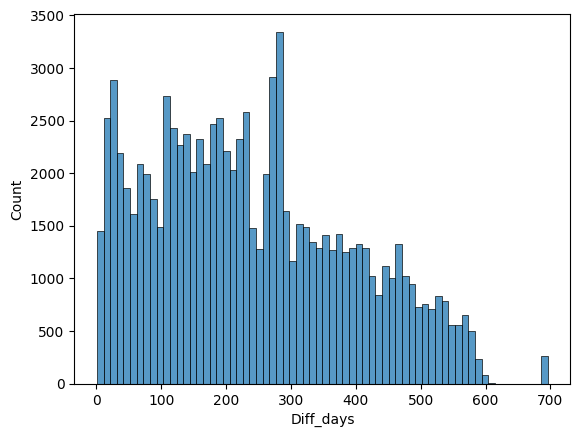

In [29]:
sns.histplot(merged_df2['Diff_days'])

In [139]:
# 결합하여 클러스터링 진행
#위에서 생성한 집계 데이터를 포함시키고, 원-핫 인코딩이 필요한 다른 카테고리(예: category, customer_state, payment_type)만 인코딩하여 데이터 차원을 줄입니다.

# 불필요한 컬럼 제거
X = merged_df2.drop(['customer_id', 'product_id', 'seller_id', 'order_id'], axis=1)

# 원-핫 인코딩
categorical_columns = ['category', 'customer_state', 'payment_type','customer_zip_code_prefix']
X = pd.get_dummies(X, columns=categorical_columns)

# 결측값 처리
X = X.fillna(0)

# KMeans 모델 적용
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# 클러스터 할당
merged_df2['cluster'] = kmeans.labels_

In [140]:
from sklearn.preprocessing import OneHotEncoder

# 1. 불필요한 컬럼 제거
X = merged_df2.drop(['customer_id', 'order_id'], axis=1)

# 2. 원-핫 인코딩
categorical_columns = ['category', 'customer_state', 'payment_type','customer_zip_code_prefix']
X = pd.get_dummies(X, columns=categorical_columns)

# 3. 결측값 처리 (필요시)
X = X.fillna(0)

# 4. KMeans 적용
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, clusters[2]), xytext=(3, clusters[2] + 200000),          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, clusters[4]), xytext=(5, clusters[4] + 200000),          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


ValueError: could not convert string to float: '4244733e06e7ecb4970a6e2683c13e61'

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [107]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


ValueError: could not convert string to float: '00010242fe8c5a6d1ba2dd792cb16214'